# Diversity, Integration, and Segregation (the `dis` in `censusdis`)

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
import censusdis.states as states

import divintseg
import geopandas as gpd

### Leaf data, diversity, and integration

The `dis` in `censusdis` stands for Diversity, Integration, and Segregation.
Leaves of groups that count membership in racial and/or demographic 
groups are often inputs for DIS calculations.

In [2]:
df_king_county_demographic_blocks = ced.download(
    dataset='dec/pl',
    vintage=2020,
    
    # Get all the variables that are leaves of this group
    leaves_of_group="P2",
    
    state=states.WA,
    county="033",
    tract="*",
    block="*"
)

In [3]:
df_king_county_demographic_blocks.shape

(27686, 68)

In [4]:
df_di = divintseg.di(
    df_king_county_demographic_blocks,
    by=['STATE', 'COUNTY', 'TRACT'],
    over='BLOCK'
).reset_index()

In [5]:
df_di

,STATE,COUNTY,TRACT,diversity,integration
0,53,033,000101,0.754837,0.709493
1,53,033,000102,0.630347,0.585771
2,53,033,000201,0.654499,0.634458
3,53,033,000202,0.617814,0.581717
4,53,033,000300,0.601878,0.556926
...,...,...,...,...,...
490,53,033,032704,0.347213,0.313582
491,53,033,032705,0.322257,0.306773
492,53,033,032706,0.286983,0.255064
493,53,033,032800,0.258139,0.213807


In [6]:
gdf_tracts = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the census tracts in King County
    state=states.WA,
    county="033",
    tract="*",
    
    with_geometry=True
)

In [7]:
gdf_di = gpd.GeoDataFrame(gdf_tracts.merge(df_di, on=['STATE', 'COUNTY', 'TRACT']))

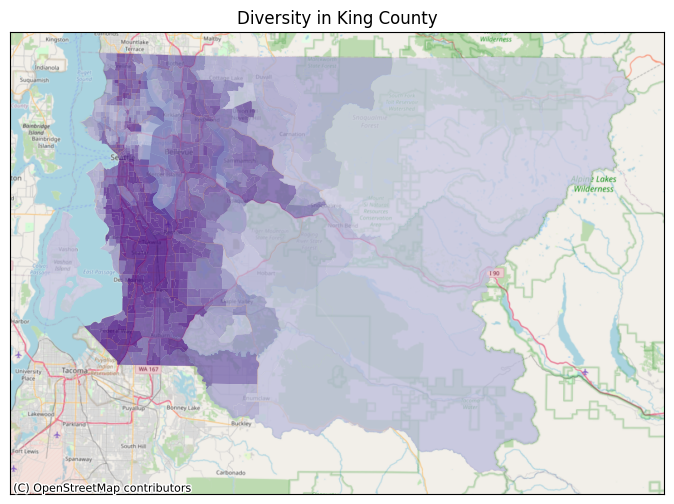

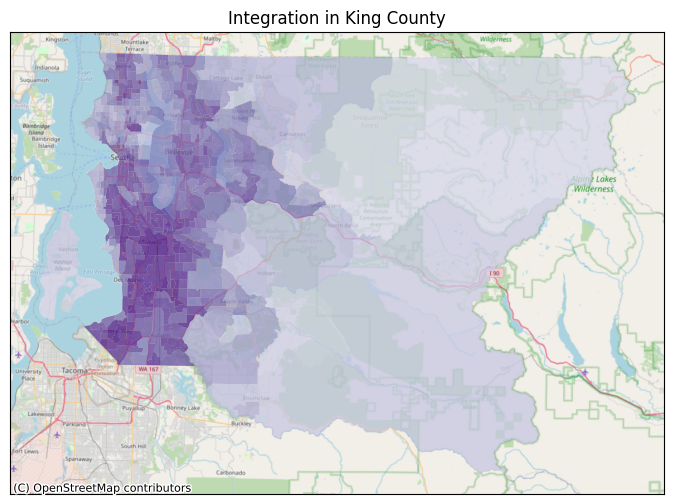

In [8]:
for col in ['diversity', 'integration']:
    ax = cem.plot_map(
        gdf_di,
        col,

        cmap="Purples",

        figsize=(12, 6),

        alpha=0.75,
        
        vmax=0.8,
        vmin=0.0,

        with_background=True,
    )

    ax.set_title(f"{col.title()} in King County")